In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import fft, integrate
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score, f1_score,\
                recall_score, confusion_matrix, fbeta_score, auc,\
                  precision_recall_curve, average_precision_score
from inspect import signature

In [3]:
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

In [4]:
import pandas as pd
import numpy as np
from scipy import ndimage
from sklearn.preprocessing import StandardScaler, normalize

class LightFluxProcessor:

    def __init__(self, fourier=True, normalize=True, gaussian=True, standardize=True):
        self.fourier = fourier
        self.normalize = normalize
        self.gaussian = gaussian
        self.standardize = standardize

    def fourier_transform(self, X):
        return np.abs(np.fft.fft(X, n=X.size))

    def process(self, df_train_x, df_dev_x):
        # Apply fourier transform
        if self.fourier:
            print("Applying Fourier...")
            df_train_x = np.apply_along_axis(self.fourier_transform, axis=1, arr=df_train_x)
            df_dev_x = np.apply_along_axis(self.fourier_transform, axis=1, arr=df_dev_x)

            # Keep the first half of data as it is symmetrical after the previous steps
            df_train_x = df_train_x[:, :(df_train_x.shape[1] // 2)]
            df_dev_x = df_dev_x[:, :(df_dev_x.shape[1] // 2)]

        # Normalize
        if self.normalize:
            print("Normalizing...")
            df_train_x = normalize(df_train_x)
            df_dev_x = normalize(df_dev_x)

        # Gaussian filter to smooth out data
        if self.gaussian:
            print("Applying Gaussian Filter...")
            df_train_x = ndimage.filters.gaussian_filter(df_train_x, sigma=10)
            df_dev_x = ndimage.filters.gaussian_filter(df_dev_x, sigma=10)

        if self.standardize:
            # Standardize X data
            print("Standardizing...")
            std_scaler = StandardScaler()
            df_train_x = std_scaler.fit_transform(df_train_x)
            df_dev_x = std_scaler.transform(df_dev_x)

        print("Finished Processing!")
        return df_train_x, df_dev_x




Loading datasets...
Applying Fourier...
Applying Gaussian Filter...


C:\Users\vikas\AppData\Local\Temp\ipykernel_20952\1388030299.py:37: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  df_train_x = ndimage.filters.gaussian_filter(df_train_x, sigma=10)
C:\Users\vikas\AppData\Local\Temp\ipykernel_20952\1388030299.py:38: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  df_dev_x = ndimage.filters.gaussian_filter(df_dev_x, sigma=10)
C:\Users\vikas\Desktop\exoplanet\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Finished Processing!
Training...


C:\Users\vikas\Desktop\exoplanet\env\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vikas\Desktop\exoplanet\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\vikas\Desktop\exoplanet\env\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vikas\Desktop\exoplanet\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\vikas\Desktop\exoplanet\env\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increa

Finished training!

Making predictions..
Finished predictions!


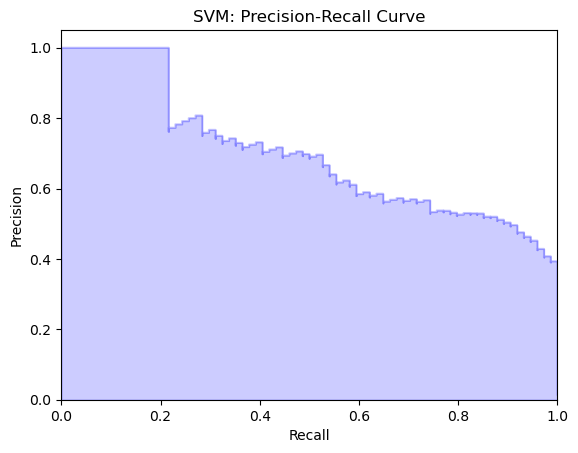

AUC training set: 0.700
AUC test set: 0.048
Accuracy training set: 0.986
Accuracy test set: 0.963
Precision training set: 0.000
Precision test set: 0.000
Recall training set: 0.000
Recall test set: 0.000
F1 score training set: 0.000
F1 score test set: 0.000
 
Confusion Matrix - Train Set
[[5050    0]
 [  74    0]]
Confusion Matrix - Test Set
[[554  11]
 [ 10   0]]


C:\Users\vikas\Desktop\exoplanet\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
def main():
    trainSetPath = "Data/exoTrain.csv"  # Loads datasets, requires a folder named "datasets"
    testSetPath = "Data/exoTest.csv"    # containing the data files in your current folder
    print("Loading datasets...")
    df_train = pd.read_csv(trainSetPath, encoding = "ISO-8859-1")
    df_test = pd.read_csv(testSetPath, encoding = "ISO-8859-1")

    # Generate X and Y dataframe set
    df_train_x = df_train.drop('LABEL', axis=1) 
    df_test_x = df_test.drop('LABEL', axis=1)
    df_train_y = df_train.LABEL
    df_test_y = df_test.LABEL
    
    X_train = np.array(df_train_x)    #
    Y_train = np.array(df_train_y)    # The raw input/output data for
    X_test= np.array(df_test_x)     # both train and test sets as np.arrays
    Y_test= np.array(df_test_y)     #

    #Adding mirrored series
    extra = np.flip(X_train[0:37,:], axis=-1)
    extraY = Y_train[0:37]
    X_train = np.append(X_train,extra, axis=0)
    Y_train = np.append(Y_train,extraY,axis=0) #Kan vara bra att lägga till fler exempel för test-setet också
    dextra = np.flip(X_test[0:5,:], axis=-1)
    dextraY = Y_test[0:5]
    X_test = np.append(X_test, dextra, axis=0)
    Y_test = np.append(Y_test,dextraY,axis=0)

    Y_train=Y_train-1       #
    Y_test=Y_test-1     # To get postives to 1 and negatives to 0

    # Process dataset - choose which should be used
    LFP = LightFluxProcessor(
        fourier=True,
        normalize=False,             
        gaussian=True,             
        standardize=False)      
    X_train, X_test = LFP.process(X_train, X_test)

    #Normalization - gives better recall but worse precision
    # X_train = ((X_train - np.mean(X_train, axis=1).reshape(-1,1)) / np.std(X_train, axis=1).reshape(-1,1))
    # X_test = ((X_test - np.mean(X_test, axis=1).reshape(-1,1)) / np.std(X_test, axis=1).reshape(-1,1))


    #TRAINING AND EVALUATING THE SVC
    c_w = {0: 1,  #Directory for trying out different class weights
          1: 1}      #Change to kernel=c_w to use

    model=CalibratedClassifierCV(LinearSVC())
    print("Training...")
    model.fit(X_train, Y_train)            # Choose which data to train on
    print("Finished training!")
    print('')
    print("Making predictions..")
    train_outputs=model.predict(X_train)     # Making predictions
    test_outputs =model.predict(X_test)    #

    train_prob = model.predict_proba(X_train)[:,1]
    test_prob = model.predict_proba(X_test)[:,1]
    print("Finished predictions!")

    #region Various metrics for performance
    ap_train = average_precision_score(Y_train, train_prob)
    ap_test = average_precision_score(Y_test, test_prob)

    #Precision recall curve
    precision, recall, thresholds = precision_recall_curve(Y_train,train_prob) #train
    precision_d, recall_d, thresholds_d = precision_recall_curve(Y_test,test_prob) #test
    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                if 'step' in signature(plt.fill_between).parameters
                else {})
    plt.step(recall, precision, color='b', alpha=0.2,
            where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('SVM: Precision-Recall Curve')
    plt.show()

    accuracy_train=accuracy_score(Y_train,train_outputs)
    accuracy_test=accuracy_score(Y_test,test_outputs)
    precision_train=precision_score(Y_train,train_outputs)
    precision_test=precision_score(Y_test,test_outputs)
    recall_train = recall_score(Y_train, train_outputs)
    recall_test = recall_score(Y_test,test_outputs)
    f1_train = f1_score(Y_train,train_outputs)
    f1_test = f1_score(Y_test,test_outputs)

    print("AUC training set: %.3f" %ap_train )
    print("AUC test set: %.3f" %ap_test )
    print("Accuracy training set: %.3f" %accuracy_train)
    print("Accuracy test set: %.3f" %accuracy_test)
    print("Precision training set: %.3f" %precision_train)
    print("Precision test set: %.3f" %precision_test)
    print("Recall training set: %.3f" %recall_train)
    print("Recall test set: %.3f" %recall_test)
    print("F1 score training set: %.3f" %f1_train)
    print("F1 score test set: %.3f" %f1_test)
    print(' ')
    confM=confusion_matrix(Y_train,train_outputs)
    print("Confusion Matrix - Train Set")
    print(confM)

    confMd=confusion_matrix(Y_test,test_outputs)
    print("Confusion Matrix - Test Set")
    print(confMd) 
main()